# Cross Industry Standart Process for Data Mining 

In this section we are going to analise Boston AIRBNB Data Set. We are looking to help people on cleaning datasets e how to deal with some especific data. In this post we are going to cover all the subjects bellow:

1. Business Understanding: Understand the problem 
2. Data Understanding:  Understand the data to solve your problem
3. Data Preparation: Organizing it in a way that will allow us to answer our questions of interests.	
4. Modeling: Building a predictive model
5. Evaluation
6. Insights

 

In [1]:
#first we import de the libraries wich are going to be used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#then we open the sugested datasets
df_calendar = pd.read_csv("calendar.csv")
df_reviews = pd.read_csv("reviews.csv")
df_listings = pd.read_csv("listings.csv")

# 1. Business Understanding 

Understanding de Problem.

We are solving two questions:
* Price, there are any correlations that we can made, in order to predict it?

# 2. Data Understanding

Understand the data to solve your problem.

Now that we have stabilished ours goals, we need to undestand our data in order to get there

### Let's take a look at the data?


In [3]:
df_calendar.head() #looking calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
df_listings.head(2) #looking listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [7]:
df_reviews.head()# looking reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [8]:
print("We have {} rows(cases) and {} features. Our primary goal is to look into these {} features.".format(df_listings.shape[0],df_listings.shape[1],df_listings.shape[1]))

We have 3585 rows(cases) and 95 features. Our primary goal is to look into these 95 features.


As we have a lot of features, let's select some columns that may have correlation with our goal (predict price).

In [9]:
view_df_listings = pd.DataFrame(df_listings.dtypes, columns=["type"])
view_df_listings[:50] #lets take a look at the first 50 columns, wich ones we are going to pick

,type
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
name,object
summary,object
space,object
description,object
experiences_offered,object
neighborhood_overview,object


In [10]:
view_df_listings[50:]

,type
is_location_exact,object
property_type,object
room_type,object
accommodates,int64
bathrooms,float64
bedrooms,float64
beds,float64
bed_type,object
amenities,object
square_feet,float64


For these two ranges of columns, after tooking a look i  selected the following columns to be part of our data:

* host_response_time
* host_response_rate
* host_acceptance_rate
* host_is_superhost
* host_total_listings_count
* latitude
* longitude
* property_type
* room_type
* accommodates
* bathrooms
* bedrooms
* beds
* bed_type
* amenities
* square_feet
* security_deposit
* cleaning_fee
* guests_included
* extra_people
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value
* cancellation_policy



In [11]:
df_base = df_listings[["host_response_time","host_response_rate","host_acceptance_rate",
                       "host_is_superhost","host_total_listings_count","latitude","longitude",
                       "property_type","room_type","accommodates","bathrooms","bedrooms","beds",
                       "bed_type","amenities","square_feet","security_deposit","cleaning_fee",
                       "guests_included","extra_people","review_scores_rating","review_scores_accuracy",
                       "review_scores_cleanliness","review_scores_checkin","review_scores_communication",
                       "review_scores_location","review_scores_value","cancellation_policy","price"]]

print("Now we have {} features".format(df_base.shape[1]))

Now we have 29 features


In [12]:
no_nulls = set(df_base.columns[df_base.isnull().mean()==0]) ##selecting only columns fully completed
print('''Of all selected features only the following columns are fully completed, without any NANs.

{}
'''.format(no_nulls))

Of all selected features only the following columns are fully completed, without any NANs.

{'price', 'room_type', 'longitude', 'guests_included', 'latitude', 'amenities', 'cancellation_policy', 'host_total_listings_count', 'host_is_superhost', 'bed_type', 'accommodates', 'extra_people'}



In [13]:
print(df_base.shape)
df_base.isnull().sum()

(3585, 29)


host_response_time              471
host_response_rate              471
host_acceptance_rate            471
host_is_superhost                 0
host_total_listings_count         0
latitude                          0
longitude                         0
property_type                     3
room_type                         0
accommodates                      0
bathrooms                        14
bedrooms                         10
beds                              9
bed_type                          0
amenities                         0
square_feet                    3529
security_deposit               2243
cleaning_fee                   1107
guests_included                   0
extra_people                      0
review_scores_rating            813
review_scores_accuracy          823
review_scores_cleanliness       818
review_scores_checkin           820
review_scores_communication     818
review_scores_location          822
review_scores_value             821
cancellation_policy         

### Data Conclusion

Conclusions:

1. As we can see **square_feet** is the columns with most NAN values, so we are going to drop it. 
2. For **bathrooms, bedrooms and beds**, as we understand that they exist, but for some reason didn't show up. We will fill it with the int(mean or average)
3. Column **Security_deposit** all the NAN values will be replaced by 0
4. All the **review_scores** with NAN values will be dropped, because we can't put a value that it doesn't exist
5. Column **cleaning_fee** all the NAN values will be replaced by 0
6. All the **host_response_time**,**host_is_superhost** NANs we are going to be dropped because they are categorical features
7. All the **host_response_rate**,**host_acceptance_rate** NANs we are going to be filled with their mean/average.
8. We will also drop the rows of **property_type** that have NANs values

# Data Preparation

Organizing it in a way that will allow us to answer our questions of interests

In [14]:
df_base_t1 = df_base.drop(["square_feet"], axis = 1)# 1.Dropping square_feet

In [15]:
#symbols
df_base_t1['host_response_rate'] = df_base_t1['host_response_rate'].str.rstrip('%')#removing symbol
df_base_t1['host_acceptance_rate'] = df_base_t1['host_acceptance_rate'].str.rstrip('%')#removing symbol
df_base_t1['security_deposit'] = df_base_t1['security_deposit'].str.lstrip('$')#removing symbol
df_base_t1['cleaning_fee'] = df_base_t1['cleaning_fee'].str.lstrip('$')#removing symbol
df_base_t1['extra_people'] = df_base_t1['extra_people'].str.lstrip('$')#removing symbol
df_base_t1['price'] = df_base_t1['price'].str.lstrip('$')#removing symbol


mean_1 = {"cleaning_fee": 0,#replacing 0
          "security_deposit": "0.00",#replacing 0
          "bathrooms": int(df_base.square_feet.mean()),#mean of the column
          "bedrooms": int(df_base.square_feet.mean()), #mean of the column
          "beds": int(df_base.square_feet.mean()) #mean of the column
} #dict


df_base_t1 = df_base_t1.fillna(value = mean_1) # 2, 3 an 5.Filling with the mean() of the columns

In [16]:
#4 an 6. Dropping NANs on the review_scores
df_base_t1.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                          'review_scores_communication','review_scores_location','review_scores_value',
                          'host_response_time','host_is_superhost'], inplace = True) 


In [17]:
#7. Replacing categorical cloumns, or simbols 
print(df_base_t1.host_response_time.value_counts())

#creating dict for this column
host_response_time = {"within an hour":1,
                      "within a few hours":2,
                      "within a day":3,
                      "a few days or more":4}

df_base_t1= df_base_t1.replace({"host_response_time":host_response_time}) #replacing categorical

within an hour        1169
within a few hours     972
within a day           379
a few days or more      21
Name: host_response_time, dtype: int64


In [18]:
#types
df_base_t1['host_response_rate']= df_base_t1['host_response_rate'].astype(int) #converting type
df_base_t1['host_acceptance_rate']= df_base_t1['host_acceptance_rate'].astype(int) #converting type
df_base_t1['cleaning_fee']= df_base_t1['cleaning_fee'].astype(float)#converting type
df_base_t1['extra_people']= df_base_t1['extra_people'].astype(float)#converting type

#symbols inteference

# converting price type

df_base_t1.price=df_base_t1.price.str.replace(",","")
df_base_t1['price']= df_base_t1['price'].astype(float)#converting type


# converting security_deposit type

df_base_t1.security_deposit=df_base_t1.security_deposit.str.replace(",","")
df_base_t1['security_deposit']= df_base_t1['security_deposit'].astype(float)#converting type

In [19]:
### categorical

#creating dict for this column
host_is_superhost = {"f":0,
                      "t":1}

df_base_t1= df_base_t1.replace({"host_is_superhost":host_is_superhost}) #replacing categorical


#creating dict for this column
property_type = {"Apartment":1,
                 "House":2,
                 "Condominium":3,
                 "Townhouse":4,
                 "Bed & Breakfast":4,
                 "Loft":4,
                 "Boat":4,
                 "Other":4,
                 "Villa":4,
                 "Dorm":4,
                 "Guesthouse":4,
                 "Entire Floor":4}

df_base_t1= df_base_t1.replace({"property_type":property_type}) #replacing categorical


#creating dict for this column
room_type = {"Entire home/apt":1,
                     "Private room":2,
                     "Shared room":3}

df_base_t1= df_base_t1.replace({"room_type":room_type}) #replacing categorical



#creating dict for this column
bed_type = {"Real Bed":1,
            "Futon":2,
            "Airbed":3,
            "Pull-out Sofa":4,
            "Couch":5}

df_base_t1= df_base_t1.replace({"bed_type":bed_type}) #replacing categorical


#creating dict for this column
cancellation_policy = {"strict":1,
            "moderate":2,
            "flexible":3,
            "super_strict_30":4}

df_base_t1= df_base_t1.replace({"cancellation_policy":cancellation_policy}) #replacing categorical


### Finished? Not yet...

All we did until now it was putting in numbers what words were showing us.

**property_type**: As there were a lot of property types, i creted four categories (1=Apartment,2= House,3=Condominium,4= Others) eache one especified in the dict above. Eventhough we had more types of property, i consider only four, because it could increase our dimmensionality of data.

I did this to almost every variable, but one is missing, **amenities**, i left this one because there were a lot o categories inside of it. And even if i use get_dummy variables, it could increase the dimmensionality of the data, making the predictions get worse in the future. So i thought we could count how many good amenities are in the house, so that now we transform this information in a number.

In [20]:
df_base_t1 = df_base_t1.reset_index(drop=True) #reseting the index

colunas 3,7,8,13,14,26
simbolos 15 = security_deposit
16 = cleaning_fee
18 = extra_people
27 = price

In [21]:
amenities = []
for i in df_base_t1.amenities:
    a = i.split(",")
    amenities.append(len(a))
    
df_base_t1["amenities"] = pd.DataFrame(amenities)

In [22]:
print('''Almost forgot that we still have some values missing...

'''
,df_base_t1.isnull().sum()>0,df_base_t1.shape)

Almost forgot that we still have some values missing...

 host_response_time             False
host_response_rate             False
host_acceptance_rate           False
host_is_superhost              False
host_total_listings_count      False
latitude                       False
longitude                      False
property_type                   True
room_type                      False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
bed_type                       False
amenities                      False
security_deposit               False
cleaning_fee                   False
guests_included                False
extra_people                   False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_val

In [23]:
df_base_t1 = df_base_t1.dropna()

print('''Let's take a look now...

'''
,df_base_t1.isnull().sum()>0,df_base_t1.shape)


Let's take a look now...

 host_response_time             False
host_response_rate             False
host_acceptance_rate           False
host_is_superhost              False
host_total_listings_count      False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
bed_type                       False
amenities                      False
security_deposit               False
cleaning_fee                   False
guests_included                False
extra_people                   False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
cancellatio

### Let's take a look in our Database

Let's just take a look and try to see if we can get some insides of the data.

In [24]:
df_base_t1.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,longitude,property_type,room_type,accommodates,...,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,price
count,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,...,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1.705002,95.655376,85.200473,0.152816,46.361166,42.338923,-71.083105,1.456479,1.422607,3.092950,...,12.420244,92.024025,9.439149,9.291453,9.647499,9.648681,9.411973,9.167783,1.780228,167.444663
std,0.745368,10.637509,21.104630,0.359881,145.176363,0.025377,0.031456,0.821294,0.530230,1.852741,...,20.003926,8.978688,0.894196,1.102030,0.749970,0.725703,0.900284,0.980609,0.862348,110.551321
min,1.000000,0.000000,0.000000,0.000000,1.000000,42.235942,-71.171469,1.000000,1.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,11.000000
25%,1.000000,97.000000,76.000000,0.000000,1.000000,42.325538,-71.103792,1.000000,1.000000,2.000000,...,0.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,85.000000
50%,2.000000,100.000000,95.000000,0.000000,2.000000,42.344839,-71.076860,1.000000,1.000000,2.000000,...,0.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,149.000000
75%,2.000000,100.000000,100.000000,0.000000,7.000000,42.355101,-71.061635,2.000000,2.000000,4.000000,...,20.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,219.000000
max,4.000000,100.000000,100.000000,1.000000,749.000000,42.389982,-71.000100,4.000000,3.000000,16.000000,...,200.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1300.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E8D577898>,
      dtype=object)

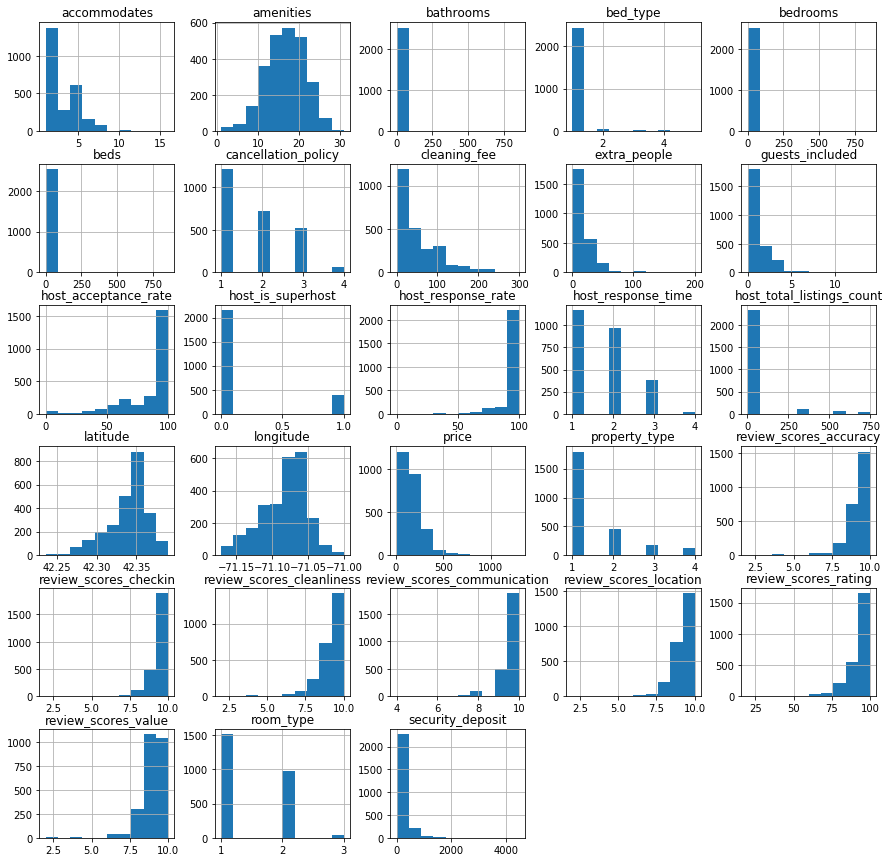

In [25]:
df_base_t1.hist(figsize=(15,15) )

### And what about the correlations?

There is a good graphic that will help us to see what columns are correlated to each other.

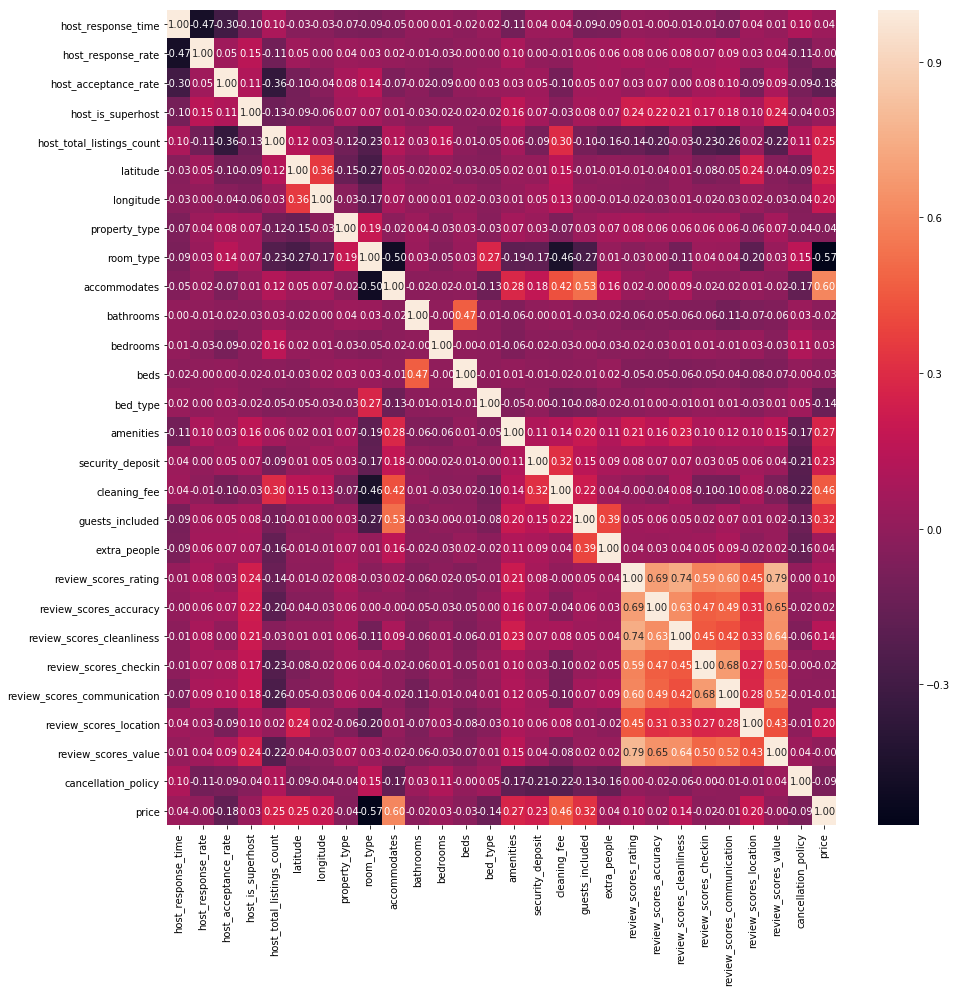

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_base_t1.corr(), annot=True, fmt=".2f",ax=ax)

# Modeling,  Evaluating and Insights

In [27]:
X= df_base_t1[["host_response_time","host_response_rate","host_acceptance_rate",
                       "host_is_superhost","host_total_listings_count","latitude","longitude",
                       "property_type","room_type","accommodates","bathrooms","bedrooms","beds",
                       "bed_type","amenities","security_deposit","cleaning_fee",
                       "guests_included","extra_people","review_scores_rating","review_scores_accuracy",
                       "review_scores_cleanliness","review_scores_checkin","review_scores_communication",
                       "review_scores_location","review_scores_value","cancellation_policy"]]


y = df_base_t1[["price"]]

In [28]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.5841291849355454 on 762 values.'